This notebook presents all the analysis reported in Study 10 of the paper.

Click the "Show Code" buttons to see the code associated with each output.

# Preamble

## Libraries

In [1]:
# Misc
import warnings

warnings.filterwarnings("ignore")
from functools import partial

# Data libraries
import pandas as pd
import numpy as np

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

sns.set_context("notebook")

# Statistics
import statsmodels.formula.api as smf
import scipy.stats as stats

# Interface with R
import rpy2

%load_ext rpy2.ipython


%R library(sjstats); # For effect sizes of ANOVAs

STUDY_NAME = "Study 10"

## Functions

In [2]:
def perc_formatter(x, y, prec=2):
    return "{:.{prec}f}%".format(x, prec=prec)


def plot_design(save=False, show=True, grayscale=False, figname=f"Fig 18 - {STUDY_NAME} - Design"):
    # fmt: off
    dists_var = {
    'Low-High': [18.0, 19.0, 19.0, 20.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 23.0, 23.0, 
                 23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 26.0, 26.0, 27.0, 27.0, 28.0, 
                 10.0, 13.0, 15.0, 17.0, 18.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 
                 29.0, 30.0, 31.0, 32.0, 34.0, 35.0, 36.0, 38.0, 39.0, 41.0, 43.0, 46.0],
    'High-High': [5.0, 8.0, 10.0, 12.0, 13.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 
                  24.0, 25.0, 26.0, 27.0, 29.0, 30.0, 31.0, 33.0, 34.0, 36.0, 38.0, 41.0, 
                  10.0, 13.0, 15.0, 17.0, 18.0, 20.0, 21.0, 22.0, 24.0, 25.0, 26.0, 27.0, 28.0, 
                  29.0, 30.0, 31.0, 32.0, 34.0, 35.0, 36.0, 38.0, 39.0, 41.0, 43.0, 46.0],
    'Low-Low': [18.0, 19.0, 19.0, 20.0, 20.0, 21.0, 21.0, 21.0, 22.0, 22.0, 22.0, 23.0, 23.0, 
                23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 26.0, 26.0, 27.0, 27.0, 28.0, 
                23.0, 24.0, 24.0, 25.0, 25.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 28.0, 28.0, 
                28.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 31.0, 31.0, 32.0, 32.0, 33.0],
    'High-Low': [5.0, 8.0, 10.0, 12.0, 13.0, 15.0, 16.0, 17.0, 19.0, 20.0, 21.0, 22.0, 23.0, 
                 24.0, 25.0, 26.0, 27.0, 29.0, 30.0, 31.0, 33.0, 34.0, 36.0, 38.0, 41.0, 
                 23.0, 24.0, 24.0, 25.0, 25.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 28.0, 28.0, 
                 28.0, 29.0, 29.0, 29.0, 30.0, 30.0, 30.0, 31.0, 31.0, 32.0, 32.0, 33.0]
    }
    # fmt: on
    if grayscale:
        pal = sns.color_palette("Greys")[2::3][::-1]
        pathname = "Grayscale"
    else:
        pal = sns.color_palette()[1:4:2][::-1]
        pathname = "Color"

    if show:
        sns.set_context("notebook")
    else:
        sns.set_context("paper")

    sns.set_style("ticks")

    fig, axes = plt.subplots(2, 2, figsize=(6.38, 4))
    axes = axes.flatten()
    (ax1, ax2, ax3, ax4) = axes
    bins = np.arange(1, 52, 0.5)
    for i, (vartype, ax) in enumerate(
        zip(["Low-Low", "Low-High", "High-Low", "High-High"], axes)
    ):
        ax.hist(
            dists_var[vartype][0:25],
            bins=bins,
            label="Other Item (Smartphones/White Wine)",
            color=pal[1],
            rwidth=1,
            align="left",
            ec=pal[1],
        )
        ax.hist(
            dists_var[vartype][25:],
            bins=bins,
            label="Red Wines",
            color=pal[0],
            rwidth=0.5,
            align="left",
            ec=pal[0],
        )
        leg = ax.legend()
        han = leg.legendHandles
        leg.remove()
        ax.set_ylim(0, 4)
        ax.set_xticks(np.arange(4, 52, 8))
        ax.set_xticklabels([f"${i}" for i in np.arange(4, 52, 8)])
        ax.set_xlim(-1, 51)
        ax.set_yticks([])
        sns.despine(ax=ax)

    for ax, col in zip([axes[0], axes[1]], ["Low", "High"]):
        ax.set_title(col + " SD Red Wines")
    for ax, row in zip([axes[0], axes[2]], ["Low", "High"]):
        ax.set_ylabel(row + " SD\nOther Item", rotation=90, labelpad=5)

    ax4.legend(
        han,
        ["Other Item", "Red Wines"],
        frameon=False,
        loc="upper center",
        bbox_to_anchor=(0.5, 0.85),
    )
    plt.tight_layout()
    if save:
        plt.savefig(
            f"../Figures/{pathname}/{figname}.png", dpi=100, bbox_inches="tight"
        )
    if show:
        plt.show()
    else:
        plt.close()

## Data loading and preparation 

In [3]:
df_agg = (
    pd.read_csv(f"../Data/{STUDY_NAME}/LongData.csv")
    .groupby(
        [
            "turkid",
            "pid",
            "item",
            "similarity",
            "sd_item_one",
            "sd_item_two",
            "sd_focal",
            "sd_other",
            "mean_focal",
            "mean_other",
        ]
    )
    .value.agg(**{"value_std": np.std})
    .reset_index()
)

# Design

## Characteristics and distributions

Like in study 4, all participants saw two distributions:

* Red wines: SD manipulated between subjects $\sigma \in [2.74, 9.65]$, constant Mean, $\mu = 28$
* Second item: SD manipulated between subjects $\sigma \in [2.74, 9.65]$, constant Mean, $\mu = 22$

This study included another between-subjects factor: Similarity:
* For half of the participants, the second item was labeled "white wines" (high-similarity condition)
* For the other half, the second item was labeled "smartphone cases" (low-similarity condition)

Visualization of the distributions in the four experimental conditions:

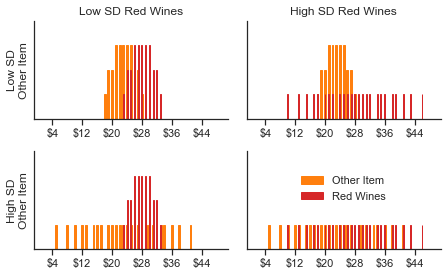

In [4]:
plot_design(save=True)

## Number of valid participants

In [5]:
df_agg.pid.unique().shape[0]

877

# Analysis

## SD of reported distributions

In [6]:
colnames = [
    "Intercept",
    "Given Item: High vs. Low SD",
    "Other Item: High vs. Low SD",
    "Cumulative Impact of High vs. Low SD",
    "Similarity: Low vs. High",
    "Similarity $\\times$ Given Item",
    "Similarity $\\times$ Other Item",
    "Three-Way Interaction",
]
results = smf.mixedlm(
    "value_std~\
C(sd_focal, Diff, levels=['Low','High'])\
*C(sd_other, Diff, levels=['Low', 'High'])\
*C(similarity, Diff, levels=['Similar', 'Dissimilar'])",
    data=df_agg,
    groups=df_agg.turkid,
).fit()
results.summary(
    yname="SD of Reported Dist.",
    xname_fe=colnames,
    xname_re=["Participant Random Effects"],
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
================================================================================
Model:                  MixedLM     Dependent Variable:     SD of Reported Dist.
No. Observations:       1754        Method:                 REML                
No. Groups:             877         Scale:                  2.7416              
Min. group size:        2           Log-Likelihood:         -3722.9606          
Max. group size:        2           Converged:              Yes                 
Mean group size:        2.0                                                     
--------------------------------------------------------------------------------
                                     Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------
Intercept                             6.118    0.059 104.302 0.000  6.003  6.233
Given Item: High vs. Low SD           3.571    0.100  35.681 0.000  3.375  3.767
Other Item: High vs. Low SD           1.276    0.100  12.754 0.000  1.080  1.473
Cumulative Impact of High vs. Low SD -0.413    0.117  -3.520 0.000 -0.643 -0.183
Similarity: Low vs. High             -0.633    0.235  -2.698 0.007 -1.093 -0.173
Similarity $\times$ Given Item        0.484    0.200   2.419 0.016  0.092  0.877
Similarity $\times$ Other Item       -0.385    0.200  -1.926 0.054 -0.778  0.007
Three-Way Interaction                 0.832    0.469   1.772 0.076 -0.088  1.751
Participant Random Effects            1.646    0.123                            
================================================================================

"""

In [7]:
stdbetas = results.params / df_agg.value_std.std(ddof=1)
stdbetas.index = colnames + ["Participant Random Effects"]
table = pd.DataFrame(stdbetas, columns=["Standardized Betas"])
table.style.format("{:.2f}")

,Standardized Betas
Intercept,2.16
Given Item: High vs. Low SD,1.26
Other Item: High vs. Low SD,0.45
Cumulative Impact of High vs. Low SD,-0.15
Similarity: Low vs. High,-0.22
Similarity $\times$ Given Item,0.17
Similarity $\times$ Other Item,-0.14
Three-Way Interaction,0.29
Participant Random Effects,0.21


The similarity of the labels assigned to the distribution has a significant impact on the dispersion of the reported distribution:
* It increases the impact of the SD of the true distribution
* It weakens the impact of the SD of the other distribution

## Simple Effects

### Dissimilar Labels

In [8]:
colnames = [
    "Intercept",
    "Given Item: High vs. Low SD",
    "Other Item: High vs. Low SD",
    "Cumulative Impact of High vs. Low SD",
    "Similarity: Low vs. High",
    "Similarity $\\times$ Given Item",
    "Similarity $\\times$ Other Item",
    "Three-Way Interaction",
]
results = smf.mixedlm(
    "value_std~\
C(sd_focal, Diff, levels=['Low','High'])\
*C(sd_other, Diff, levels=['Low', 'High'])\
*C(similarity, Treatment('Dissimilar'))",
    data=df_agg,
    groups=df_agg.turkid,
).fit()
results.summary(
    yname="SD of Reported Dist.",
    xname_fe=colnames,
    xname_re=["Participant Random Effects"],
)

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Mixed Linear Model Regression Results
===============================================================================
Model:                 MixedLM     Dependent Variable:     SD of Reported Dist.
No. Observations:      1754        Method:                 REML                
No. Groups:            877         Scale:                  2.7416              
Min. group size:       2           Log-Likelihood:         -3722.9606          
Max. group size:       2           Converged:              Yes                 
Mean group size:       2.0                                                     
-------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                             5.912    0.082 71.715 0.000  5.750  6.073
Given Item: High vs. Low SD           3.813    0.140 27.188 0.000  3.538  4.088
Other Item: High vs. Low SD           1.084    0.140  7.727 0.000  0.809  1.359
Cumulative Impact of High vs. Low SD  0.413    0.117  3.520 0.000  0.183  0.643
Similarity: Low vs. High             -0.217    0.330 -0.659 0.510 -0.864  0.429
Similarity $\times$ Given Item       -0.484    0.200 -2.419 0.016 -0.877 -0.092
Similarity $\times$ Other Item        0.385    0.200  1.926 0.054 -0.007  0.778
Three-Way Interaction                -0.832    0.469 -1.772 0.076 -1.751  0.088
Participant Random Effects            1.646    0.123                           
===============================================================================

"""

In [9]:
stdbetas = results.params / df_agg.value_std.std(ddof=1)
stdbetas.index = colnames + ["Participant Random Effects"]
table = pd.DataFrame(stdbetas, columns=["Standardized Betas"])
table.style.format("{:.2f}")

,Standardized Betas
Intercept,2.08
Given Item: High vs. Low SD,1.34
Other Item: High vs. Low SD,0.38
Cumulative Impact of High vs. Low SD,0.15
Similarity: Low vs. High,-0.08
Similarity $\times$ Given Item,-0.17
Similarity $\times$ Other Item,0.14
Three-Way Interaction,-0.29
Participant Random Effects,0.21
